# Pytorch Tutorial

## Learn the basics

* Website: https://pytorch.org/tutorials/beginner/basics/intro.html
* Topic: Use the FashionMNIST dataset to train a neural network that predicts if an input image belongs to one of the following classes: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, or Ankle boot.

### Quickstart

PyTorch has [two primitives to work with data](https://pytorch.org/docs/stable/data.html): `torch.utils.data.DataLoader` and `torch.utils.data.Dataset`. `Dataset` stores the samples and their corresponding labels, and `DataLoader` wraps an iterable around the `Dataset`.

In [1]:
'''
PyTorch offers domain-specific libraries such as TorchText, TorchVision, and TorchAudio, 
all of which include datasets. For this tutorial, we will be using a TorchVision dataset.
'''

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

In [3]:
# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [4]:
'''
We pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset, 
and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we 
define a batch size of 64, i.e. each element in the dataloader iterable will return a batch 
of 64 features and labels.
'''

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


#### Visualize the dataset

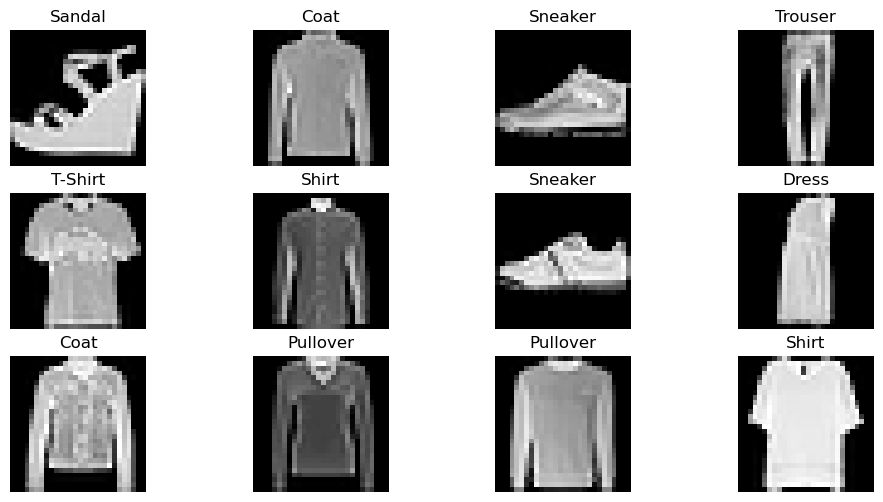

In [5]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(12, 6))
cols, rows = 4, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### Creating a model

In [6]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [7]:
 # Visualizing Pipelines in HTML
from sklearn import set_config; set_config(display='diagram')
from sklearn.pipeline import Pipeline

#pipe = Pipeline(model)

In [8]:
!conda update conda -y && conda update python -y

Solving environment: done

## Package Plan ##

  environment location: /Users/stephy/opt/anaconda3

  added / updated specs:
    - conda


The following packages will be REMOVED:

  python_abi-3.9-2_cp39

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-22.9.0-py39h6e9494~ --> pkgs/main::conda-22.9.0-py39hecd8cb5_0 None


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: ...working... done
Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


In [9]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

## Package Plan ##

  environment location: /Users/stephy/opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.9-2_cp39 None

The following packages will be UPDATED:

  conda              pkgs/main::conda-22.9.0-py39hecd8cb5_0 --> conda-forge::conda-22.9.0-py39h6e9494a_1 None


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.
